In [4]:
import os
import sys
import torch
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Get the current working directory
current_dir = os.getcwd()

# Assuming the structure is LAM/datasets, navigate to the parent directory (LAM)
base_dir = os.path.dirname(current_dir)

# Add the base directory (LAM) to the system path
sys.path.insert(0, base_dir)

from trainer.utils import draw_map, get_field
from dataset.gen_dataset.gen_dataset import get_visibility_matrix


# Generate visibility matrix from audio 

In [6]:
clip_name = "/scratch/data/repos/LAM/dataset/simulated/arni_eval_output_vardur_poly2_maxdur2s/095_polyphony2_8_146_0_8_18_21.wav"
T_sti = 10e-3 # 100ms audio frames
fs, eigen_sig = wavfile.read(clip_name)
vsg_sig, apgd = get_visibility_matrix(eigen_sig, fs, apgd=True, bands=[3], T_sti=T_sti) # visibility graph matrix 32ch 

In [19]:
# APGD Map Dimensions (axis, num_frames, num_pixels)
print(apgd[0, ].shape)

(20, 484)


# Generate acoustic map visualization

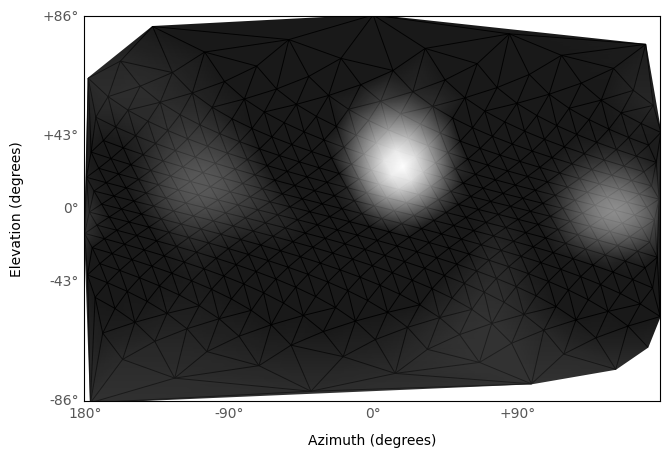

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
R_field = get_field()
arg_lonticks = np.linspace(-180, 180, 5)
apgd_map = np.abs(apgd[0, 10])
apgd_map /= apgd_map.max()
apgd_map = np.tile(apgd_map, (3, 1))
fig2, ax2, triangulation2 = draw_map(apgd_map, R_field,
        lon_ticks=arg_lonticks,
        catalog=None,
        show_labels=True,
        show_axis=True,
        fig=fig,
        ax=ax)